<Axes: ylabel='genres'>

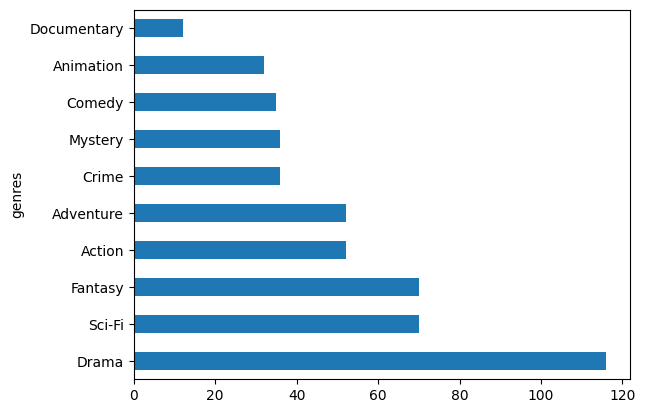

In [85]:
#Gráfico Na Horizontal dos generos de séries e filmes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

movie = pd.read_csv('/workspaces/Projeto_IA/BD/TMDB_Test.csv')

#Parte para separar os generos, pois no .csv os generos estão 'Fantasia & ficção cientifica'.
movie['genres'] = movie['genres'].str.replace('[\[\]\'\']', '', regex=True)
movie['genres'] = movie['genres'].str.split(',')
movie = movie.explode('genres')
movie['genres'] = movie['genres'].str.split(' & ')
movie = movie.explode('genres')
movie['genres'] = movie['genres'].str.split(', ')
movie = movie.explode('genres')

movie['genres'].value_counts()[:10].plot(kind='barh')

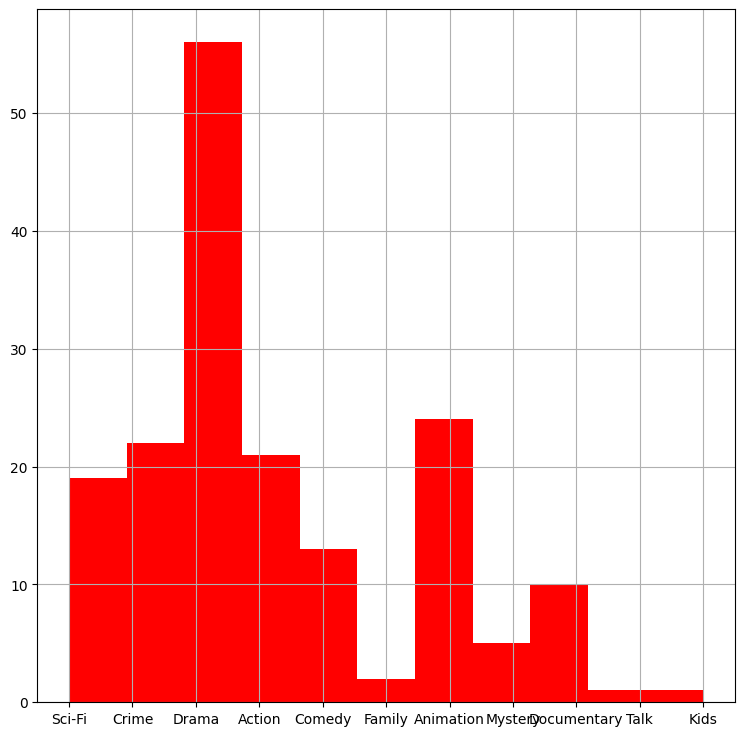

In [16]:
#Gráfico na vertical dos generos de séries e filmes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

movie = pd.read_csv('/workspaces/Projeto_IA/BD/TMDB_Test.csv')
movie['genres'] = movie['genres'].str.split(',').str[0]
movie['genres'].hist(bins=11,figsize=(9,9),color='r');

In [17]:
import pandas as pd

# Carregando o arquivo CSV
movie = pd.read_csv('/workspaces/Projeto_IA/BD/TMDB_Test.csv')

# Separando os diferentes gêneros e criando uma nova coluna com o primeiro gênero
movie['Gênero:'] = movie['genres'].str.split(',').str[0]

# Agrupando e contando os gêneros:
movie['Gênero:'].value_counts().to_frame('Quantidade')


,Quantidade
Gênero:,
Drama,56
Animation,24
Crime,22
Action,21
Sci-Fi,19
Comedy,13
Documentary,10
Mystery,5
Family,2


In [23]:
#Uma versão básica do sistema de recomendação

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

movie = pd.read_csv('/workspaces/Projeto_IA/BD/TMDB_Test.csv')

movie['genres'] = movie['genres'].str.split(',')

# Filtragem de filmes:
def recommend_movies_by_genre(input_genre,num_recommendations=5):

    filtered_movies = movie[movie['genres'].apply(lambda x: input_genre in x if isinstance(x, list) else False)]


    if filtered_movies.empty:
        print(f"Nenhum filme encontrado no gênero '{input_genre}'")
        return


    recommendations = filtered_movies.sample(num_recommendations)

    return recommendations

genre_dict = {
    1: 'Action',2: 'Drama',3: 'Fantasy',4: 'Documentary',5: 'Comedy',6: 'Animation',7: 'Crime',8: 'Music',9: 'Adventure',10: 'Mystery',11: 'Sci-Fi', 12: 'Mystery', 13: 'Family'
     # Adicione mais gêneros conforme necessidade.
}

# Solicitar ao usuário que escolha um gênero:
print("Selecione um gênero:")
for num, genre in genre_dict.items():
    print(f"{num}. {genre}")

selected_genre = None
while selected_genre not in genre_dict:
    try:
        selected_genre = int(input("\n Digite o número do gênero desejado: "))
    except ValueError:
        pass

input_genre = genre_dict[selected_genre]

recommendations = recommend_movies_by_genre(input_genre)

if recommendations is not None:
    print(f"=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=\nRecomendações de séries/animes no gênero '{input_genre}':")
    print(recommendations[['name']])

Selecione um gênero:
1. Action
2. Drama
3. Fantasy
4. Documentary
5. Comedy
6. Animation
7. Crime
8. Music
9. Adventure
10. Mystery
11. Sci-Fi
12. Mystery
13. Family
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Recomendações de séries/animes no gênero 'Animation':
                      name
85                  Arcane
113  SpongeBob SquarePants
163   Ao-chan Can't Study!
36         Attack on Titan
107         Jujutsu Kaisen
